In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from cluster_snippets import cluster_snippets

In [3]:
from cluster_snippets_plot import plot_clusters
import local_directories as ldir
from preprocess_data import preprocess_data
from segment_data import segment_data
from locate_snippets import locate_snippets
from upsample_snippets import upsample_snippets

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
# set number of electrodes
electrodes = [30]

In [5]:
wl = 21
uf = 5
max_fraction = 0.3
min_fraction = 0.1
# when min_frac=0, max_frac=1 not working ??
plt.ion()
k_val = range(2, 5)
n_pc_val = [0, 2, 5, 40]
row_titles = ["k = 2", "k = 3", "k = 4"]
col_titles = ["No proj", "PC = 2 (av)", "PC = 2",
            "PC = 5 (av)", "PC = 5", "PC = 40 (av)",
            "PC = 40"]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = a[a_slice]


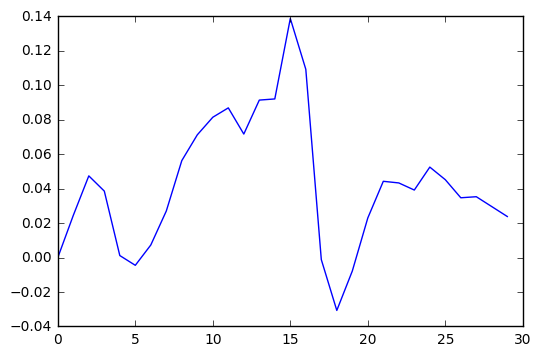

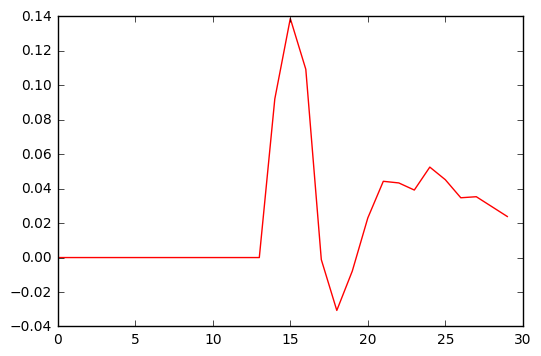

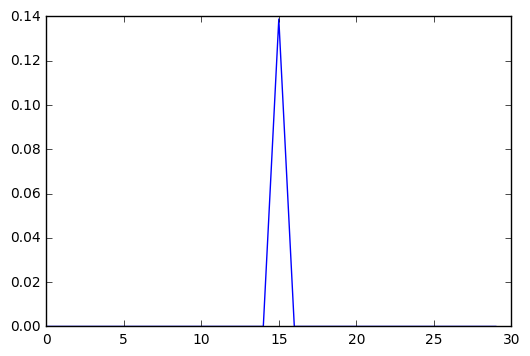

/Users/starry1990/Documents/spike-sorting-project-yue/real_data/upsample_snippets.py:56: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  upsampled_matrix = np.zeros((n_snippets, wl_up))


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [6]:
for e in electrodes:
    data_electrode = np.load(ldir.DATA_PATH + str(e) + ".npy")
    #print(data_electrode)
    
    # visdualize data/processed data
    # plt.plot(data_electrode[0:400])
    data = preprocess_data(data_electrode)
    #print(data)
    # plt.plot(100*data[0:400])
    # plt.show()
    
    ind_ini, ind_end = segment_data(data, wl, max_fraction, min_fraction)
    
    y_axis=np.zeros(len(data))
   
    for x in range(len(ind_ini)):
        y_axis[ind_ini[x]:ind_end[x]] = data[ind_ini[x]:ind_end[x]]
    
    # visdualize segment_data function, threshold energy over window len wl, the returned indices
    # are the energy of percentage from min-max
    #print(ind_ini,ind_end)
    
    take_len=30
    
    #print(data[0:take_len])
    plt.plot(data[0:take_len])
    
    plt.show()
    
    plt.plot(y_axis[0:take_len],'r')
    plt.show()
    
    # visdualize snippet, get maximum element inside the selected intervals(has certain energy)
    
    extrema = locate_snippets(data, ind_ini, ind_end, wl)
    y_axis2 = np.zeros(len(data))
    for y in extrema:
        real_num=data[y]
        y_axis2[y] = real_num
    #print(y_axis2)
    plt.plot(y_axis2[0:take_len])
    plt.show()
    
    # visdualize upsampling 
    
    upsamp_res = upsample_snippets(data,extrema, wl, uf)
    
    



In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.cm as cm
import matplotlib.colors as col
from electrode_positions import *
# import spike signal
from preprocess_data import *
import local_directories as ldir
import seaborn as sns
from electrode_positions import *
from segment_data import *
cmap = cm.seismic


data=np.zeros((512,1200000))
data1=data[0]
wl=int(41)
max_fraction=0.2
min_fraction=0.1

electrodes=np.arange(1)
for e in electrodes:
    data_electrode = np.load(ldir.DATA_PATH + str(e) + ".npy")
    data1 = preprocess_data(data_electrode)
    

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  b = a[a_slice]


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in sqrt


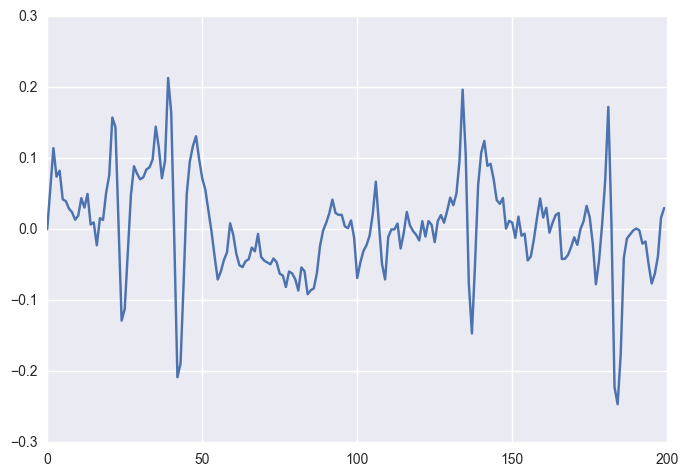

In [8]:
# new kernel try

n = len(data1)
h = (wl - 1) / 2
h = int(h)
  # windowed_data_sq = np.convolve(data ** 2, np.ones(h + 1), "same")
  
  # windowed_data_aux = np.sqrt(windowed_data_sq)
window = np.hstack((np.ones(h/2), -np.ones(h/2)))
windowed_data_newKer = np.convolve(data1, window)
windowed_data = windowed_data_newKer / np.amax(windowed_data_newKer)

windowed_data_sq = np.convolve(data1 ** 2, -np.ones(h + 1), "same")
windowed_data_aux = np.sqrt(windowed_data_sq)
windowed_data2 = windowed_data_aux / np.amax(windowed_data_aux)

#plt.plot(windowed_data2[0:300])
#plt.plot(windowed_data_newKer[0:300])
plt.plot(data1[0:200])
plt.show()



